Unicamp - MO826 - Ciência e Visualização de Dados em Saúde

Felipe Marinho Tavares

RA: 265680

Laboratório #4

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import ttest_ind

In [2]:
def read_and_plot_df(pathdata):
    df = pd.read_csv(pathdata)
    print(f"{pathdata}\n\nhead:")
    display(df.head())
    print("describe:")
    display(df.describe())
    return df

def df_corr_analysis(df, y=None):
    print("correlation matrix:")
    display(df.corr())
    print("correlation matrix heatmap:")
    sn.heatmap(df.corr())
    plt.show()
    c = df.corr().abs()
    s = c.unstack()
    so = s.sort_values(kind="quicksort")
    so = so[(so >= 0.5) & (so < 1.0)][::2]

    if so.size != 0:
        print(f"Sets with corr >=05 or < 1.0:\n")
        print(so)

# Análise 1 - Teste de Hipóteses

Considerando a base Zombies Survey (zombies-survey.csv), apresente um teste de hipóteses que realize um estudo sobre a relação entre altura e gênero dos zumbis. Construa suas hipóteses, apresente a análise e as conclusões.

### Zombie Survey Dataset (zombies-survey.csv)

    name - Zombie name
    type - biological, chemical or technological
    gender - the gender before becoming a zombie
    weight - weight in kg
    height - height in m
    GBC - Green Blood Cells (million cells per microliter - mcL)
    GS - Green Substance (g/dL - grams per deciliter)
    PBC - Purple Blood Cells (million cells per microliter - mcL)
    SP - Sticky Paste (g/dL - grams per deciliter)


In [3]:
pathdata = "zombies_raw/zombies-survey.csv"
df = read_and_plot_df(pathdata)

zombies_raw/zombies-survey.csv

head:


,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,1.88,109.72,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,1.75,73.62,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,1.88,96.50,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,1.82,99.81,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,1.77,93.60,0.8,14,5.0,3.6


describe:


,height,weight,gbc,gs,pbc,sp
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.683000,72.428400,4.794667,37.586667,5.843333,3.054000
std,0.099837,15.001481,3.052643,17.644204,0.828066,0.433594
min,1.430000,38.500000,0.400000,10.000000,4.300000,2.000000
25%,1.610000,61.245000,1.200000,16.000000,5.100000,2.800000
50%,1.685000,71.725000,5.200000,43.500000,5.800000,3.000000
75%,1.757500,84.517500,7.200000,51.000000,6.400000,3.300000
max,1.910000,109.720000,10.000000,69.000000,7.900000,4.400000


Sumarização de altura para zumbis homens:


,count,mean,std,min,25%,50%,75%,max
height,75.0,1.756133,0.065283,1.61,1.715,1.75,1.805,1.91


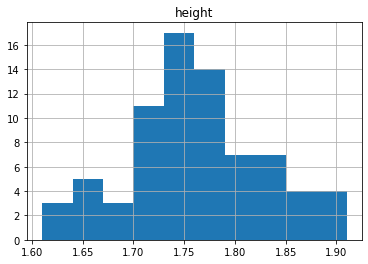

In [4]:
print("Sumarização de altura para zumbis homens:")
display(df[df['gender'] == 'male'][['height']].describe().T)
df[df['gender'] == 'male'][['height']].hist()
plt.show()

Sumarização de altura para zumbis mulheres:


,count,mean,std,min,25%,50%,75%,max
height,75.0,1.609867,0.070471,1.43,1.565,1.61,1.66,1.78


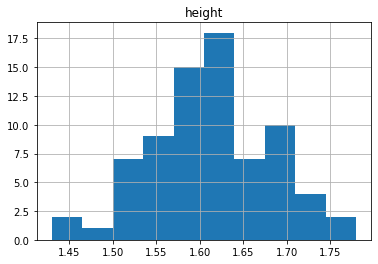

In [5]:
print("Sumarização de altura para zumbis mulheres:")
display(df[df['gender'] == 'female'][['height']].describe().T)
df[df['gender'] == 'female'][['height']].hist()
plt.show()

Distribuições sobrepostas


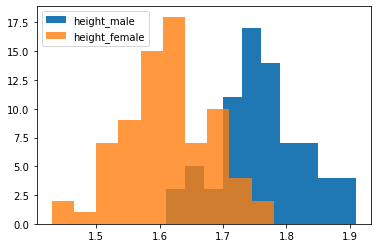

In [6]:
print('Distribuições sobrepostas')

plt.figure()
plt.hist(df[df['gender'] == 'male'][['height']], label='height_male')
plt.hist(df[df['gender'] == 'female'][['height']], label='height_female', alpha=0.8)
plt.legend()
plt.show()

In [7]:
print('Teste de hipótese para que "male" e "female" tenham a mesma distribuição de "height":')

ttest_ind(a=df[df['gender'] == 'male']['height'],
          b=df[df['gender'] == 'female']['height'])

Teste de hipótese para que "male" e "female" tenham a mesma distribuição de "height":


Ttest_indResult(statistic=13.18622576079698, pvalue=9.500026659737847e-27)

Com p-value menor que 5% ou 1%, obtido `9.5e-27`, é possível dizer que existe evidência para que a distribuição de altura para zumbis homens e para zumbis mulheres é diferente.

# Análise 2 - Regressão Linear

Considerando a base Zombie Meals (zombie-meals.csv) que lista refeições típicas de zumbis e sua caracterização em termos de proteínas, calorias, sódio, etc.  A última coluna (rating) representa a nota média da avaliação feita pelos zumbis para aquela refeição.


Realize uma regressão linear e analise a influência destas características (proteínas, calorias, sódio, etc.) dos alimentos com as avaliações (ratings) feitas pelos zumbis. Analise as características que mais influenciam na avaliação (se houver) e monte um modelo de regressão (com uma ou múltiplas variáveis independentes) que você acha que melhor prediz o rating. Considere aspectos como influência dos parâmetros, correlação, R2 e overfitting.

zombies_raw/zombie-meals.csv

head:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
0,Oven-Grilled Silver Gerbil,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Thermal-Cooked Chaos Seal,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,Oven-Baked Phase Ferret,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,Simmered Nightmare Havanese,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Ethereal Watercress Soufflé,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


describe:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


correlation matrix:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


correlation matrix heatmap:


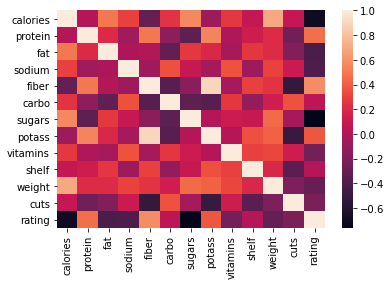

Sets with corr >=05 or < 1.0:

fiber     protein     0.500330
cuts      fiber       0.513061
potass    protein     0.549407
calories  sugars      0.562340
fiber     rating      0.584160
rating    calories    0.689376
calories  weight      0.696091
sugars    rating      0.759675
potass    fiber       0.903374
dtype: float64


In [8]:
df = read_and_plot_df('zombies_raw/zombie-meals.csv')
df_corr_analysis(df)

In [9]:
print("Features with strong correlation with 'rating':")

corr_w_rating = df.corr()[['rating']].abs().sort_values(by='rating')
strong_corr = corr_w_rating[(corr_w_rating['rating'] >= 0.5) & (corr_w_rating['rating'] < 1.0)]
strong_corr

Features with strong correlation with 'rating':


,rating
fiber,0.584160
calories,0.689376
sugars,0.759675


Between the three features (fiber, calories, and sugars) only calories and sugars have a considerably strong correlation (`0.562340`). Thus, for the regression model are going to be considered as features: sugars, and fiber.

In [10]:
seed=1082141

col_features = ['sugars', 'fiber']
col_y = ['rating']

from sklearn.model_selection import train_test_split

# splitting training and test

dt_train, dt_test = train_test_split(df[col_features + col_y], test_size=0.3, random_state=seed)

print("dt_train")
display(dt_train.describe().T)

print("dt_test")
display(dt_test.describe().T)

dt_train


,count,mean,std,min,25%,50%,75%,max
sugars,53.0,7.132075,4.256388,-1.000000,3.000000,7.000000,11.000000,15.000000
fiber,53.0,1.720755,1.715916,0.000000,0.000000,1.000000,3.000000,9.000000
rating,53.0,40.492074,12.431162,18.042851,31.072217,39.106174,49.787445,72.801787


dt_test


,count,mean,std,min,25%,50%,75%,max
sugars,24.0,6.458333,4.898795,0.000000,3.000000,5.500000,11.000000,15.000000
fiber,24.0,3.104167,3.276992,0.000000,1.000000,3.000000,3.250000,14.000000
rating,24.0,47.465807,16.362274,21.871292,37.664661,41.721976,54.869253,93.704912


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
dt_train_scaled = dt_train.copy()
dt_train_scaled[col_features] = scaler.fit_transform(dt_train[col_features])

# split features from labels
X_dt_train_scaled = dt_train_scaled[col_features]
Y_dt_train = dt_train_scaled[col_y]

## apply to test
dt_test_scaled = dt_test.copy()
dt_test_scaled[col_features] = scaler.transform(dt_test[col_features])
X_dt_test_scaled = dt_test_scaled[col_features]
Y_dt_test = dt_test_scaled[col_y]

print("dt_train_scaled")
display(dt_train_scaled.describe().T)

print("dt_test_scaled")
display(dt_test_scaled.describe().T)

dt_train_scaled


,count,mean,std,min,25%,50%,75%,max
sugars,53.0,8.797994e-17,1.009570,-1.928841,-0.980084,-0.031327,0.917430,1.866187
fiber,53.0,-2.094760e-17,1.009570,-1.012416,-1.012416,-0.424060,0.752652,4.282787
rating,53.0,4.049207e+01,12.431162,18.042851,31.072217,39.106174,49.787445,72.801787


dt_test_scaled


,count,mean,std,min,25%,50%,75%,max
sugars,24.0,-0.159804,1.161942,-1.691652,-0.980084,-0.387111,0.917430,1.866187
fiber,24.0,0.813939,1.928038,-1.012416,-0.424060,0.752652,0.899741,7.224567
rating,24.0,47.465807,16.362274,21.871292,37.664661,41.721976,54.869253,93.704912


In [12]:
%%time
reg = LinearRegression(n_jobs=-1)

print(f"Modelo de regressão usando features {col_features} com separação de treino/teste de 70/30 para predição de {col_y}")

reg.fit(X_dt_train_scaled, Y_dt_train)
train_r2 = reg.score(X_dt_train_scaled, Y_dt_train)
test_r2 = reg.score(X_dt_test_scaled, Y_dt_test)
print(f"train_r2: {train_r2}")
print(f"test_r2: {test_r2}")
print()

Modelo de regressão usando features ['sugars', 'fiber'] com separação de treino/teste de 70/30 para predição de ['rating']
train_r2: 0.7676228218173158
test_r2: 0.8342304289102374

CPU times: user 11.1 ms, sys: 11.6 ms, total: 22.6 ms
Wall time: 147 ms


In [13]:
%%time
reg = LinearRegression(n_jobs=-1)

col_1feature = ['sugars']
print(f"Modelo de regressão usando feature {col_1feature} com separação de treino/teste de 70/30 para predição de {col_y}")

reg.fit(X_dt_train_scaled[col_1feature], Y_dt_train)
train_r2 = reg.score(X_dt_train_scaled[col_1feature], Y_dt_train)
test_r2 = reg.score(X_dt_test_scaled[col_1feature], Y_dt_test)
print(f"train_r2: {train_r2}")
print(f"test_r2: {test_r2}")
print()

Modelo de regressão usando feature ['sugars'] com separação de treino/teste de 70/30 para predição de ['rating']
train_r2: 0.6238474064307834
test_r2: 0.4230951226395617

CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 11.7 ms


### Discussão dos resultados

Analisando os resultados para o modelo de regressão, a escolha de usar as duas features ("sugars", "fiber") trouxe resultados melhores que apenas o uso de sugars.

A princípio o efeito de overfitting não foi observado no caso de duas features, dado que os resultados do score R^2 no treino e teste não ficaram muito diferentes e inclusive até sendo marginalmente melhores no teste. No caso de uma feature, o resultado entre treino e teste apresentou um declínio considerável, podendo ser explicado por overfitting ou a falta de informações necessárias para predizer "rating" visto que foi usada apenas uma feature.

# Análise 3 - Regressão Logística

Considerando a base Zombies Survey (zombies-survey.csv), realize uma regressão logistica para predizer o gênero dos zumbis a partir das outras features. Analise as features que mais influenciam na predição (se houver) e monte um modelo de regressão (com uma ou múltiplas variáveis independentes) que você acha que melhor prediz o gênero. Considere aspectos como influência dos parâmetros, correlação e overfitting.

### Zombie Survey Dataset (zombies-survey.csv)

    name - Zombie name
    type - biological, chemical or technological
    gender - the gender before becoming a zombie
    weight - weight in kg
    height - height in m
    GBC - Green Blood Cells (million cells per microliter - mcL)
    GS - Green Substance (g/dL - grams per deciliter)
    PBC - Purple Blood Cells (million cells per microliter - mcL)
    SP - Sticky Paste (g/dL - grams per deciliter)

zombies_raw/zombies-survey.csv

head:


,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,1.88,109.72,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,1.75,73.62,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,1.88,96.50,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,1.82,99.81,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,1.77,93.60,0.8,14,5.0,3.6


describe:


,height,weight,gbc,gs,pbc,sp
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.683000,72.428400,4.794667,37.586667,5.843333,3.054000
std,0.099837,15.001481,3.052643,17.644204,0.828066,0.433594
min,1.430000,38.500000,0.400000,10.000000,4.300000,2.000000
25%,1.610000,61.245000,1.200000,16.000000,5.100000,2.800000
50%,1.685000,71.725000,5.200000,43.500000,5.800000,3.000000
75%,1.757500,84.517500,7.200000,51.000000,6.400000,3.300000
max,1.910000,109.720000,10.000000,69.000000,7.900000,4.400000


correlation matrix:


,height,weight,gbc,gs,pbc,sp
height,1.000000,0.922604,0.011768,0.013053,0.011812,0.024915
weight,0.922604,1.000000,0.050625,0.055102,0.037543,0.027108
gbc,0.011768,0.050625,1.000000,0.962757,0.817954,-0.356544
gs,0.013053,0.055102,0.962757,1.000000,0.871754,-0.420516
pbc,0.011812,0.037543,0.817954,0.871754,1.000000,-0.109369
sp,0.024915,0.027108,-0.356544,-0.420516,-0.109369,1.000000


correlation matrix heatmap:


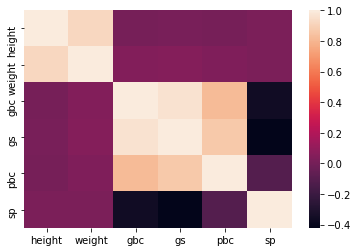

Sets with corr >=05 or < 1.0:

pbc     gbc       0.817954
gs      pbc       0.871754
weight  height    0.922604
gbc     gs        0.962757
dtype: float64


In [14]:
pathdata = "zombies_raw/zombies-survey.csv"
df = read_and_plot_df(pathdata)
df_corr_analysis(df)

In [15]:
df_onehot = pd.get_dummies(df.drop(columns=['name']))
df_onehot['gender'] = df_onehot['gender_female']
df = df_onehot.drop(columns=['gender_female', 'gender_male'])
df

,height,weight,gbc,gs,pbc,sp,type_biological,type_chemical,type_technological,gender
0,1.88,109.72,0.8,14,5.1,3.5,1,0,0,0
1,1.75,73.62,0.8,14,4.9,3.0,1,0,0,0
2,1.88,96.50,0.8,13,4.7,3.2,1,0,0,0
3,1.82,99.81,0.8,15,4.6,3.1,1,0,0,0
4,1.77,93.60,0.8,14,5.0,3.6,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
145,1.52,57.31,9.2,52,6.7,3.0,0,0,1,1
146,1.63,60.88,7.6,50,6.3,2.5,0,0,1,1
147,1.54,53.63,8.0,52,6.5,3.0,0,0,1,1
148,1.58,65.92,9.2,54,6.2,3.4,0,0,1,1


In [16]:
col_y_name = 'gender'
col_y = [col_y_name]

print(f"Features with strong correlation with '{col_y_name}':")

corr_w_rating = df.corr()[col_y].abs().sort_values(by=col_y_name)
strong_corr = corr_w_rating[(corr_w_rating[col_y_name] >= 0.5) & (corr_w_rating[col_y_name] < 1.0)]
strong_corr

Features with strong correlation with 'gender':


,gender
height,0.734981
weight,0.811750


As features 'height' e 'weight' são as que aparecem com forte correlação com 'gender'. No entanto, o mesmo conjunto de duas features tem forte correlação (`0.922604`).

In [17]:
seed=1082141

col_features = ['height', 'weight']

# splitting training and test
dt_train, dt_test = train_test_split(df[col_features + col_y], test_size=0.3, random_state=seed)

print("dt_train")
display(dt_train.describe().T)

print("dt_test")
display(dt_test.describe().T)

dt_train


,count,mean,std,min,25%,50%,75%,max
height,105.0,1.685905,0.103855,1.43,1.61,1.69,1.76,1.91
weight,105.0,72.679238,14.815125,38.50,62.34,72.33,84.57,103.76
gender,105.0,0.485714,0.502193,0.00,0.00,0.00,1.00,1.00


dt_test


,count,mean,std,min,25%,50%,75%,max
height,45.0,1.676222,0.090511,1.50,1.61,1.68,1.74,1.88
weight,45.0,71.843111,15.581791,46.31,59.44,71.12,83.70,109.72
gender,45.0,0.533333,0.504525,0.00,0.00,1.00,1.00,1.00


In [18]:
scaler = StandardScaler()
dt_train_scaled = dt_train.copy()
dt_train_scaled[col_features] = scaler.fit_transform(dt_train[col_features])

# split features from labels
X_dt_train_scaled = dt_train_scaled[col_features]
Y_dt_train = dt_train_scaled[col_y]

## apply to test
dt_test_scaled = dt_test.copy()
dt_test_scaled[col_features] = scaler.transform(dt_test[col_features])
X_dt_test_scaled = dt_test_scaled[col_features]
Y_dt_test = dt_test_scaled[col_y]

print("dt_train_scaled")
display(dt_train_scaled.describe().T)

print("dt_test_scaled")
display(dt_test_scaled.describe().T)

dt_train_scaled


,count,mean,std,min,25%,50%,75%,max
height,105.0,-1.056298e-15,1.004796,-2.475866,-0.734375,0.039621,0.716868,2.16811
weight,105.0,1.199041e-15,1.004796,-2.318115,-0.701231,-0.023686,0.806459,2.10797
gender,105.0,4.857143e-01,0.502193,0.000000,0.000000,0.000000,1.000000,1.00000


dt_test_scaled


,count,mean,std,min,25%,50%,75%,max
height,45.0,-0.093678,0.875688,-1.798619,-0.734375,-0.057128,0.523369,1.877862
weight,45.0,-0.056708,1.056793,-1.788423,-0.897916,-0.105751,0.747454,2.512191
gender,45.0,0.533333,0.504525,0.000000,0.000000,1.000000,1.000000,1.000000


In [19]:
%%time
reg = LogisticRegression(n_jobs=-1)

print(f"Regressão logística usando features {col_features} com separação de treino/teste de 70/30 para predição de {col_y}")

reg.fit(X_dt_train_scaled, Y_dt_train)
train_r2 = reg.score(X_dt_train_scaled, Y_dt_train)
test_r2 = reg.score(X_dt_test_scaled, Y_dt_test)
print(f"train_mean_accuracy: {train_r2}")
print(f"test_mean_accuracy: {test_r2}")
print()

Regressão logística usando features ['height', 'weight'] com separação de treino/teste de 70/30 para predição de ['gender']


/c/Users/languor/workspace/conda/envs/imgprocessing-t4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


train_mean_accuracy: 0.9142857142857143
test_mean_accuracy: 0.9333333333333333

CPU times: user 56.5 ms, sys: 391 ms, total: 447 ms
Wall time: 9.62 s


In [20]:
%%time
reg = LogisticRegression(n_jobs=-1)

col_1feature = ['weight']
print(f"Regressão logística usando feature {col_1feature} com separação de treino/teste de 70/30 para predição de {col_y}")

reg.fit(X_dt_train_scaled[col_1feature], Y_dt_train)
train_r2 = reg.score(X_dt_train_scaled[col_1feature], Y_dt_train)
test_r2 = reg.score(X_dt_test_scaled[col_1feature], Y_dt_test)
print(f"train_mean_accuracy: {train_r2}")
print(f"test_mean_accuracy: {test_r2}")
print()

Regressão logística usando feature ['weight'] com separação de treino/teste de 70/30 para predição de ['gender']


/c/Users/languor/workspace/conda/envs/imgprocessing-t4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


train_mean_accuracy: 0.9333333333333333
test_mean_accuracy: 0.9555555555555556

CPU times: user 16.3 ms, sys: 2.58 ms, total: 18.9 ms
Wall time: 3.23 s


### Discussão dos resultados

Analisando os resultados para a regressão logística, a escolha de usar uma feature ("weight") trouxe resultados melhores que usar as duas features ("height", "weight") que possuem forte correlação para predição de "gender", embora que ainda bastante próximos.

O efeito de overfitting não foi observado para os dois modelos pois os resultados de ambos no treino/teste ficaram bem próximos. O uso de apenas uma feature obteve por fim resultados melhores do que adicionar a feature "height", mas a diferença de 2% na acurácia pode ser um efeito observado por conta da base pequena.